# Dataset source - Kaggle<br>
Link - https://www.kaggle.com/datasets/khushipitroda/stock-market-historical-data-of-top-10-companies<br><br>

We will predict whether it will be beneficial to purchase a stock of a company on a particular day. <br>
(A stock purchase is only benificial when the closing price of the day is higher than the opening price of a day.)

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
# all libraries as needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# **Reading dataset and inserting into our dataframe**


In [112]:
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSE422/data.csv")
dataframe.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,7/17/2023,$193.99,50520160.0,$191.90,$194.32,$191.81
1,AAPL,7/14/2023,$190.69,41616240.0,$190.23,$191.18,$189.63
2,AAPL,7/13/2023,$190.54,41342340.0,$190.50,$191.19,$189.78
3,AAPL,7/12/2023,$189.77,60750250.0,$189.68,$191.70,$188.47
4,AAPL,7/11/2023,$188.08,46638120.0,$189.16,$189.30,$186.60


In [113]:
# Finding out the number of companies present
companies = dataframe['Company'].unique()
print("All companies:")
for company in companies:
  print(company)

All companies:
AAPL
SBUX
MSFT
CSCO
QCOM
META
AMZN
TSLA
AMD
NFLX


In [114]:
# As we will predict the opening and closing price for a specific company, choose a company
predicting_company = input("Enter the company name to predict from the list above : ").upper()
print("Company to predict : " + predicting_company)

Enter the company name to predict from the list above : AAPL
Company to predict : AAPL


In [115]:
# Selecting records for the chosen company
dataframe = dataframe[dataframe['Company'] == predicting_company]
dataframe

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,7/17/2023,$193.99,50520160.0,$191.90,$194.32,$191.81
1,AAPL,7/14/2023,$190.69,41616240.0,$190.23,$191.18,$189.63
2,AAPL,7/13/2023,$190.54,41342340.0,$190.50,$191.19,$189.78
3,AAPL,7/12/2023,$189.77,60750250.0,$189.68,$191.70,$188.47
4,AAPL,7/11/2023,$188.08,46638120.0,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
2511,AAPL,7/24/2013,$15.73,591624923.0,$15.68,$15.88,$15.55
2512,AAPL,7/23/2013,$14.96,354477618.0,$15.21,$15.25,$14.95
2513,AAPL,7/22/2013,$15.23,207648981.0,$15.34,$15.35,$15.20
2514,AAPL,7/19/2013,$15.18,268548901.0,$15.47,$15.50,$15.16


In [116]:
# Information about the columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     2516 non-null   object 
 1   Date        2516 non-null   object 
 2   Close/Last  2509 non-null   object 
 3   Volume      2513 non-null   float64
 4   Open        2510 non-null   object 
 5   High        2510 non-null   object 
 6   Low         2511 non-null   object 
dtypes: float64(1), object(6)
memory usage: 157.2+ KB


There is some issues in this dataset. They are: <br>
* The values of Date column needs to be formatted to Pandas 'datetime' format
* Columns Close/Last, Open, High and Low needs to be converted into numerical type
* Some Null values need to be Imputed from columns:
  *   Close/Last
  *   Volume
  *   Open
  *   High
  *   Low

In [117]:
# Converting Date column into Timestamp format
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.head()

<ipython-input-117-6ea391dd7125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Date'] = pd.to_datetime(dataframe['Date'])


,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,2023-07-17,$193.99,50520160.0,$191.90,$194.32,$191.81
1,AAPL,2023-07-14,$190.69,41616240.0,$190.23,$191.18,$189.63
2,AAPL,2023-07-13,$190.54,41342340.0,$190.50,$191.19,$189.78
3,AAPL,2023-07-12,$189.77,60750250.0,$189.68,$191.70,$188.47
4,AAPL,2023-07-11,$188.08,46638120.0,$189.16,$189.30,$186.60


In [118]:
# Converting columns Close/Last, Open, High and Low to Float type
dataframe["Close/Last"] = dataframe["Close/Last"].apply(lambda row: float(row[1:]) if type(row) == str else row)
dataframe["Open"] = dataframe["Open"].apply(lambda row: float(row[1:]) if type(row) == str else row)
dataframe["High"] = dataframe["High"].apply(lambda row: float(row[1:]) if type(row) == str else row)
dataframe["Low"] = dataframe["Low"].apply(lambda row: float(row[1:]) if type(row) == str else row)
dataframe.head()

<ipython-input-118-ebd9d7294903>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Close/Last"] = dataframe["Close/Last"].apply(lambda row: float(row[1:]) if type(row) == str else row)
<ipython-input-118-ebd9d7294903>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Open"] = dataframe["Open"].apply(lambda row: float(row[1:]) if type(row) == str else row)
<ipython-input-118-ebd9d7294903>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,2023-07-17,193.99,50520160.0,191.90,194.32,191.81
1,AAPL,2023-07-14,190.69,41616240.0,190.23,191.18,189.63
2,AAPL,2023-07-13,190.54,41342340.0,190.50,191.19,189.78
3,AAPL,2023-07-12,189.77,60750250.0,189.68,191.70,188.47
4,AAPL,2023-07-11,188.08,46638120.0,189.16,189.30,186.60


In [119]:
# Data imputation
impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(dataframe[['Close/Last', 'Volume', 'Open', 'High', 'Low']])

dataframe[['Close/Last', 'Volume', 'Open', 'High', 'Low']] = impute.transform(dataframe[['Close/Last', 'Volume', 'Open', 'High', 'Low']])

**By now, the dataframe does not have any null values.<br>
The datatypes are also adjusted.**

# Exploratory Data Analysis

In [120]:
# Information about the columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     2516 non-null   object        
 1   Date        2516 non-null   datetime64[ns]
 2   Close/Last  2516 non-null   float64       
 3   Volume      2516 non-null   float64       
 4   Open        2516 non-null   float64       
 5   High        2516 non-null   float64       
 6   Low         2516 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 157.2+ KB


In [121]:
# Description of the column values
dataframe.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,70.197326,1.495310e+08,70.171299,70.884757,69.418451
std,52.363342,9.670543e+07,52.331899,52.942673,51.719906
min,14.960000,3.134660e+07,15.210000,15.250000,14.950000
25%,28.385000,8.625942e+07,28.377500,28.620000,28.090000
50%,44.205000,1.204674e+08,44.075000,44.530000,43.770000
75%,124.452500,1.828922e+08,124.295000,125.432500,122.775000
max,193.990000,1.065209e+09,193.780000,194.480000,191.810000


<ipython-input-122-fff730b99f2c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), cmap = 'YlGnBu')


<Axes: >

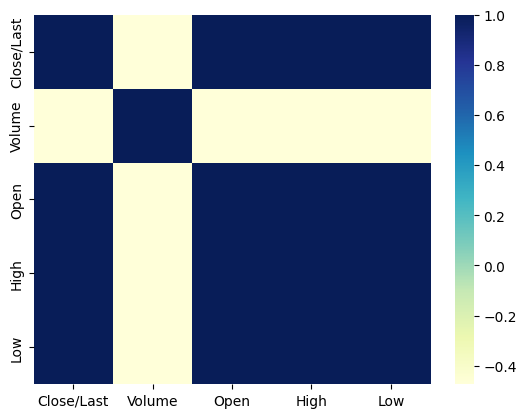

In [122]:
# Correlation heatmap
sns.heatmap(dataframe.corr(), cmap = 'YlGnBu')

# The Opening and Closing price will be predicted. High ad Low price is highly correlated with those. Since those columns add no extra information, those are dropped.

In [123]:
dataframe = dataframe.drop('High', axis=1)
dataframe = dataframe.drop('Low', axis=1)
dataframe

,Company,Date,Close/Last,Volume,Open
0,AAPL,2023-07-17,193.99,50520160.0,191.90
1,AAPL,2023-07-14,190.69,41616240.0,190.23
2,AAPL,2023-07-13,190.54,41342340.0,190.50
3,AAPL,2023-07-12,189.77,60750250.0,189.68
4,AAPL,2023-07-11,188.08,46638120.0,189.16
...,...,...,...,...,...
2511,AAPL,2013-07-24,15.73,591624923.0,15.68
2512,AAPL,2013-07-23,14.96,354477618.0,15.21
2513,AAPL,2013-07-22,15.23,207648981.0,15.34
2514,AAPL,2013-07-19,15.18,268548901.0,15.47


(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358., 19723.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

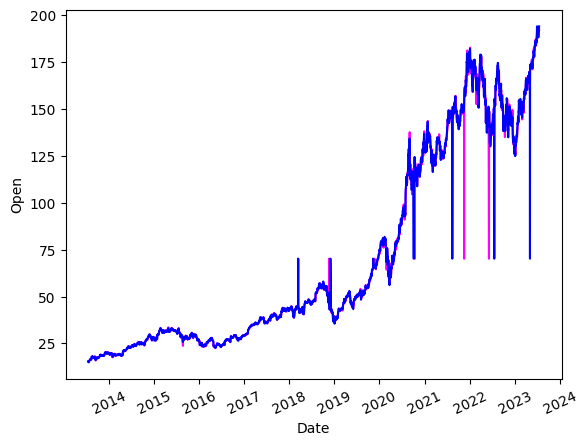

In [130]:
# Visualizing the Data
sns.lineplot(x = "Date", y = "Open", data = dataframe, color = "magenta")
sns.lineplot(x = "Date", y = "Close/Last", data = dataframe, color = "blue")
